<a href="https://colab.research.google.com/github/Silverz21/Ajuste-de-Parametros/blob/main/proyecto_4_rn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.api._v2.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

$$\textbf{Proyecto Redes Neuronales}$$



1.   Entrena una red neuronal para que reproduzca las siguientes funciones en el intervalo de $[-1,1]$. Graficar la solución en conjunto con la gráfica de la función.


(a) $3 sin(\pi x).$





Primero graficamos la función que queremos reproducir.

Los mismos datos que se utilizaran para graficar los utilizaremos como base de datos para entrenar nuestra red neuronal.

Como primer paso crearemos array NumPy formado por n números equiespaciados (en este caso serán $250$ números) entre dos dados (el intervalo dado es $[-1,1]$). Su sintaxis es:

In [2]:
x_t = np.linspace(-1, 1, 250)

Teniendo el arreglo nombraremos a la variable $y_t$ como aquella que utilice los datos para tener los datos de la función la cuál queremos graficar.

In [3]:
y_t = 3 * np.sin(np.pi * x_t)

Ahora graficaremos la función $3\sin(\pi)$ con las variables obtenidas.

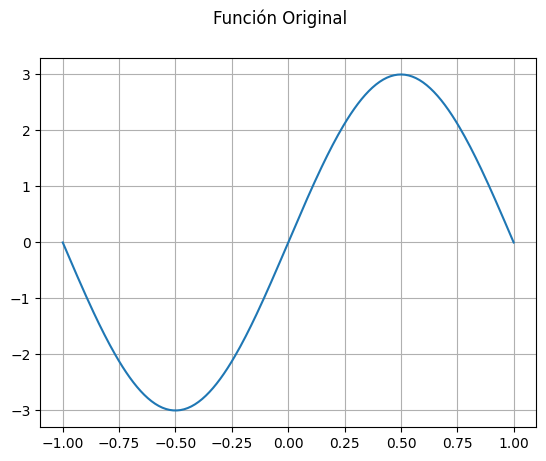

In [4]:
plt.plot(x_t, y_t)
plt.suptitle('Función Original')
plt.grid(True)
plt.show()

Definimos (utilizando keras) el modelo que vamos a utilizar para la red neuronal y lo compilamos.

La primer capa de la red neuronal constara de 128 neuronas de entrada, tiene una capa oculta con 32 neuronas y una capa de salida de una sola neurona.

In [5]:
modelo = keras.Sequential()
modelo.add(layers.Dense(128, activation="relu", input_shape=(1,)))
modelo.add(layers.Dense(32, activation="relu", input_shape=(1,)))
modelo.add(layers.Dense(1))
modelo.compile(loss="mse", optimizer="adam")

Entrenamos el modelo. Utilizamos saltos de 32 en 32 datos con 150 vueltas a los datos.
Los datos de entrenamiento son los datos $x_t$ y $y_t$.

In [6]:
history = modelo.fit(x_t, y_t, batch_size=32,
                     epochs=150, verbose=1,
                     validation_data=(x_t, y_t))

Epoch 1/100
8/8 [==============================] - 3s 85ms/step - loss: 4.1732 - val_loss: 3.8499
Epoch 2/100
8/8 [==============================] - 0s 28ms/step - loss: 3.6437 - val_loss: 3.3688
Epoch 3/100
8/8 [==============================] - 0s 23ms/step - loss: 3.1549 - val_loss: 2.8553
Epoch 4/100
8/8 [==============================] - 0s 32ms/step - loss: 2.6350 - val_loss: 2.3447
Epoch 5/100
8/8 [==============================] - 0s 28ms/step - loss: 2.1321 - val_loss: 1.8854
Epoch 6/100
8/8 [==============================] - 0s 21ms/step - loss: 1.7135 - val_loss: 1.5214
Epoch 7/100
8/8 [==============================] - 0s 26ms/step - loss: 1.4089 - val_loss: 1.2944
Epoch 8/100
8/8 [==============================] - 0s 33ms/step - loss: 1.2543 - val_loss: 1.1923
Epoch 9/100
8/8 [==============================] - 0s 25ms/step - loss: 1.1748 - val_loss: 1.1566
Epoch 10/100
8/8 [==============================] - 0s 30ms/step - loss: 1.1512 - val_loss: 1.1299
Epoch 11/100
8/8 [=

Ahora evaluamos dicho modelo y comparamos su gráfica con la de la función original.

Observamos que el modelo es bueno porque la perdida de valores es muy pequeña.

In [7]:
x_test = np.linspace(-1, 1, 250)
y_test = 3 * np.sin(np.pi * x_t)
loss_a = modelo.evaluate(x_test, y_test, verbose=1)

8/8 [==============================] - 0s 3ms/step - loss: 0.0056


8/8 [==============================] - 0s 3ms/step


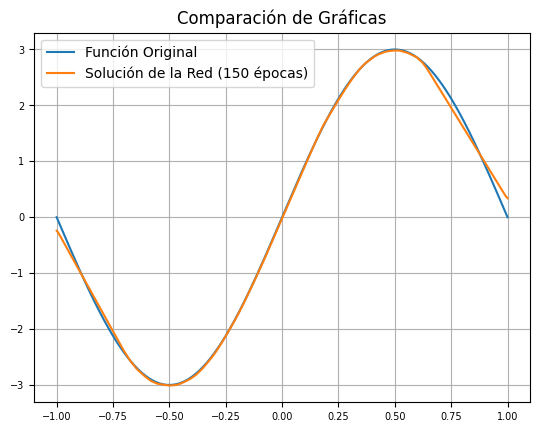

In [12]:
plt.plot(x_t, y_t, label="Función Original")
plt.plot(x_test, modelo.predict(x_test), label="Solución de la Red (150 épocas)")
plt.legend()
plt.title('Comparación de Gráficas')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.grid(True)
plt.show()

Observamos que apartir de la época 90-120 el ajuste es bueno ya que si aumentamos más las épocas el modelos se sobreajustaria.

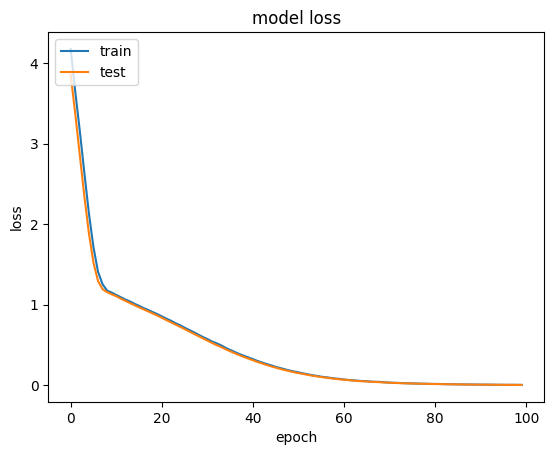

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

(b) $1+2x+4x^3$


Teniendo el modelo ya definido solo sustituimos los datos de la función $(1+2x+4x^3)$ y graficamos los resultados.

In [ ]:
x_t = np.linspace(-1, 1, 500)
y_t = 1 + 2*x_t + 4*x_t*x_t*x_t

In [ ]:
plt.plot(x_t, y_t)
plt.suptitle('Función Original')
plt.grid(True)
plt.show()

In [ ]:
history = modelo.fit(x_t, y_t, batch_size=64,
                     epochs=500, verbose=1,
                     validation_data=(x_t, y_t))

In [ ]:
x_test = np.linspace(-1, 1, 500)
y_test = 1 + 2*x_t + 4*x_t*x_t*x_t
loss_a = modelo.evaluate(x_test, y_test, verbose=1)

In [ ]:
plt.plot(x_t, y_t, label="Función Original")
plt.plot(x_test, modelo.predict(x_test), label="Solución de la Red (500 épocas)")
plt.legend()
plt.title('Comparación de Gráficas')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.grid(True)
plt.show()

2. Elegir un problema de los siguientes y diseñar y entrenar una red neuronal con Keras.
